# Import all the Libraries

In [2]:
from PIL import Image
import requests 
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Read the Files - Article - Dealing with Product Details

In [3]:
article_data=pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')
article_data.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
# This operation has the ability to plot the bar for the 20 most common products

def plot_bar(most_common):

    """
    This operation has the ability to plot the bar for the 30 most common products
    
    Parameter :
    most_common : This variable contains the most common words available from the corpus
    
    """
    x, y= [], []
    for word,count in most_common[:20]:
        
        x.append(word)
        y.append(count)
        
    #sns.barplot(x=y,y=x)
    plt.style.use('classic')
    plt.figure(figsize=(15,8))
    %matplotlib inline
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    ax = sns.barplot(x=y,y=x)
    plt.title("Top 20 Products ",fontsize=24)
    plt.xlabel("Counts",fontsize=20)
    plt.ylabel("Top Products",fontsize=15)
    plt.show()

## First we will explore Product Type Name to gain insight and understand the top 20 products 

In [5]:
print(article_data['product_type_name'].describe())

count       105542
unique         131
top       Trousers
freq         11169
Name: product_type_name, dtype: object


In [6]:
print(article_data['product_type_name'].unique())

['Vest top' 'Bra' 'Underwear Tights' 'Socks' 'Leggings/Tights' 'Sweater'
 'Top' 'Trousers' 'Hair clip' 'Umbrella' 'Pyjama jumpsuit/playsuit'
 'Bodysuit' 'Hair string' 'Unknown' 'Hoodie' 'Sleep Bag' 'Hair/alice band'
 'Belt' 'Boots' 'Bikini top' 'Swimwear bottom' 'Underwear bottom'
 'Swimsuit' 'Skirt' 'T-shirt' 'Dress' 'Hat/beanie' 'Kids Underwear top'
 'Shorts' 'Shirt' 'Cap/peaked' 'Pyjama set' 'Sneakers' 'Sunglasses'
 'Cardigan' 'Gloves' 'Earring' 'Bag' 'Blazer' 'Other shoe'
 'Jumpsuit/Playsuit' 'Sandals' 'Jacket' 'Costumes' 'Robe' 'Scarf' 'Coat'
 'Other accessories' 'Polo shirt' 'Slippers' 'Night gown' 'Alice band'
 'Straw hat' 'Hat/brim' 'Tailored Waistcoat' 'Necklace' 'Ballerinas' 'Tie'
 'Pyjama bottom' 'Felt hat' 'Bracelet' 'Blouse' 'Outdoor overall' 'Watch'
 'Underwear body' 'Beanie' 'Giftbox' 'Sleeping sack' 'Dungarees'
 'Outdoor trousers' 'Wallet' 'Swimwear set' 'Swimwear top' 'Flat shoe'
 'Garment Set' 'Ring' 'Waterbottle' 'Wedge' 'Long John'
 'Outdoor Waistcoat' 'Pumps' 'Flip

In [7]:
product_type_count=Counter(list(article_data['product_type_name']))
most_common_products=product_type_count.most_common(20)
most_common_products

[('Trousers', 11169),
 ('Dress', 10362),
 ('Sweater', 9302),
 ('T-shirt', 7904),
 ('Top', 4155),
 ('Blouse', 3979),
 ('Jacket', 3940),
 ('Shorts', 3939),
 ('Shirt', 3405),
 ('Vest top', 2991),
 ('Underwear bottom', 2748),
 ('Skirt', 2696),
 ('Hoodie', 2356),
 ('Bra', 2212),
 ('Socks', 1889),
 ('Leggings/Tights', 1878),
 ('Sneakers', 1621),
 ('Cardigan', 1550),
 ('Hat/beanie', 1349),
 ('Garment Set', 1320)]

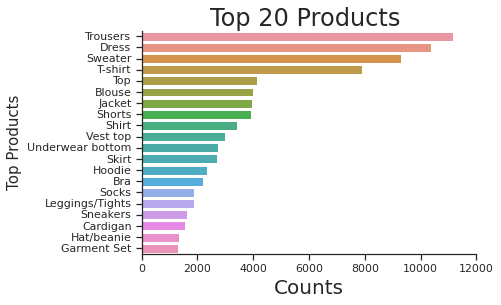

In [8]:
plot_bar(most_common_products)

### After Exploring the Product Type , we got to know that 
### 1. Trousers 
### 2. Dress 
### 3. Sweaters 
### 4. T-Shirt 
### are the most common products customer purchased.

## Next we will explore Product Name and understand which are the top 20 product name that people purchased most.

In [10]:
product_name_count=Counter(list(article_data['prod_name']))
most_common_products=product_name_count.most_common(20)
most_common_products

[('Dragonfly dress', 98),
 ('Mike tee', 72),
 ('Wow printed tee 6.99', 70),
 ('1pk Fun', 55),
 ('TP Paddington Sweater', 54),
 ('Pria tee', 51),
 ('Despacito', 48),
 ('MY', 44),
 ('Robin 3pk Fancy', 43),
 ('Eivor 7-p shaftless', 42),
 ('DANTE set', 42),
 ('R-NECK SS SLIM FIT', 42),
 ('V-NECK SS SLIM FIT', 41),
 ('Charlie Top', 41),
 ('HAPPY TEE TP', 41),
 ('CAMDEN s/s tee TP', 41),
 ('SBC OWN', 40),
 ('PETER POLO', 39),
 ('Nora T-shirt', 37),
 ('James leggings', 37)]

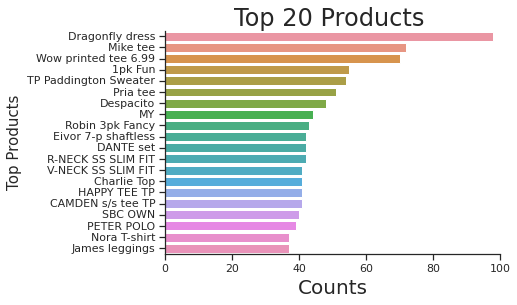

In [11]:
plot_bar(most_common_products)

### After Exploring the Product Name , we got to know that 
### 1. Dragonfly dress 
### 2. Mike Tee 
### 3. Wow Printed tee  
### are the most common products customer purchased.

## Now , we will explore Product Group Name  to understand the under which each product tied and will we see the top 20 product Group name

In [12]:
product_grp_name_count=Counter(list(article_data['product_group_name']))
most_common_products=product_grp_name_count.most_common(20)
most_common_products

[('Garment Upper body', 42741),
 ('Garment Lower body', 19812),
 ('Garment Full body', 13292),
 ('Accessories', 11158),
 ('Underwear', 5490),
 ('Shoes', 5283),
 ('Swimwear', 3127),
 ('Socks & Tights', 2442),
 ('Nightwear', 1899),
 ('Unknown', 121),
 ('Underwear/nightwear', 54),
 ('Cosmetic', 49),
 ('Bags', 25),
 ('Items', 17),
 ('Furniture', 13),
 ('Garment and Shoe care', 9),
 ('Stationery', 5),
 ('Interior textile', 3),
 ('Fun', 2)]

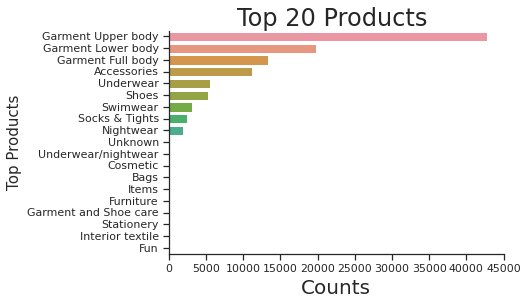

In [13]:
plot_bar(most_common_products)

### Observe that below are the top Product Group are most commonly purchased by the customer 
### 1. Garment Upper Body
### 2. Garment Lower Body
### 3. Garment Full Body
### 4. Accessories

## Explore the Index name to understand the type of the wear the customer is mostly purchased. 

In [14]:
product_index_name_count=Counter(list(article_data['index_name']))
most_common_products=product_index_name_count.most_common(20)
most_common_products

[('Ladieswear', 26001),
 ('Divided', 15149),
 ('Menswear', 12553),
 ('Children Sizes 92-140', 12007),
 ('Children Sizes 134-170', 9214),
 ('Baby Sizes 50-98', 8875),
 ('Ladies Accessories', 6961),
 ('Lingeries/Tights', 6775),
 ('Children Accessories, Swimwear', 4615),
 ('Sport', 3392)]

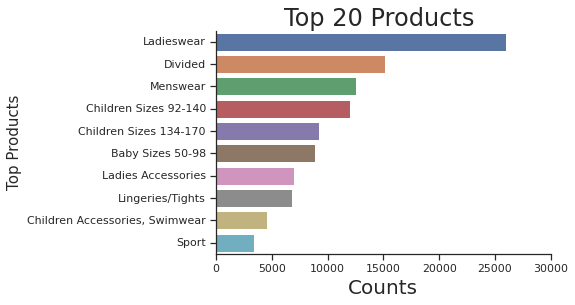

In [15]:
plot_bar(most_common_products)

### Observe that Ladieswear , Divided , Menswear are the top Product Index which Customer buys.

## Lets Explore Index Group Name to understand more of the product

In [16]:
product_index_grp_name_count=Counter(list(article_data['index_group_name']))
most_common_products=product_index_grp_name_count.most_common(20)
most_common_products

[('Ladieswear', 39737),
 ('Baby/Children', 34711),
 ('Divided', 15149),
 ('Menswear', 12553),
 ('Sport', 3392)]

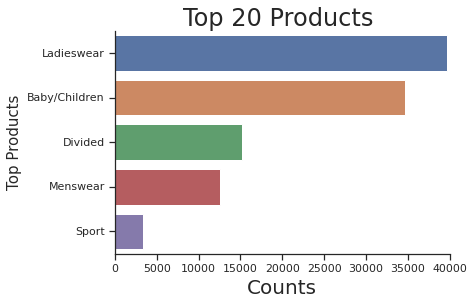

In [17]:
plot_bar(most_common_products)

## Explore Section name from the Dataset and pick to top 5 Sections

In [18]:
product_section_name_count=Counter(list(article_data['section_name']))
most_common_products=product_section_name_count.most_common(20)
most_common_products

[('Womens Everyday Collection', 7295),
 ('Divided Collection', 7124),
 ('Baby Essentials & Complements', 4932),
 ('Kids Girl', 4469),
 ('Young Girl', 3899),
 ('Womens Lingerie', 3598),
 ('Girls Underwear & Basics', 3490),
 ('Womens Tailoring', 3376),
 ('Kids Boy', 3328),
 ('Womens Small accessories', 3270),
 ('Womens Casual', 2725),
 ('Kids Outerwear', 2665),
 ('Womens Trend', 2622),
 ('Divided Projects', 2364),
 ('Young Boy', 2352),
 ('H&M+', 2337),
 ('Men Underwear', 2322),
 ('Mama', 2266),
 ('Kids & Baby Shoes', 2142),
 ('Boys Underwear & Basics', 2034)]

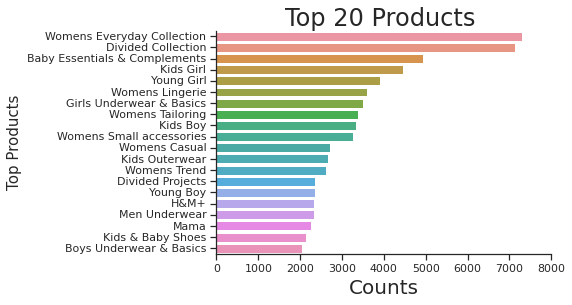

In [19]:
plot_bar(most_common_products)

### Womens every day collection is the top product under Section Category

# Explore Garment Group Name feature from the Dataset and see which Garment is on top.

In [20]:
product_section_grp_name_count=Counter(list(article_data['garment_group_name']))
most_common_products=product_section_grp_name_count.most_common(20)
most_common_products

[('Jersey Fancy', 21445),
 ('Accessories', 11519),
 ('Jersey Basic', 8126),
 ('Knitwear', 7490),
 ('Under-, Nightwear', 7441),
 ('Trousers', 6727),
 ('Blouses', 5838),
 ('Shoes', 5145),
 ('Dresses Ladies', 4874),
 ('Outdoor', 4501),
 ('Unknown', 3873),
 ('Trousers Denim', 3100),
 ('Swimwear', 2787),
 ('Socks and Tights', 2272),
 ('Shirts', 2116),
 ('Woven/Jersey/Knitted mix Baby', 1965),
 ('Shorts', 1559),
 ('Dresses/Skirts girls', 1541),
 ('Skirts', 1254),
 ('Special Offers', 1061)]

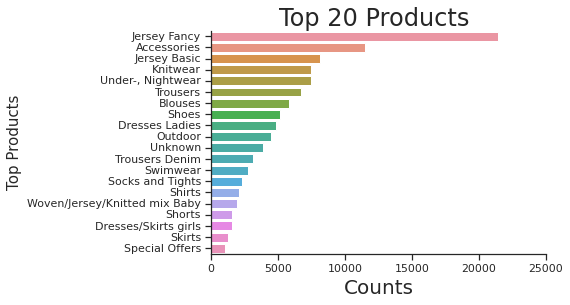

In [21]:
plot_bar(most_common_products)